# Final recommendation system STI. 2023-1
##### Andrés Poveda, Juan Pablo Bueno, Juan Camilo Munera, Sebastian Mosquera.


In [6]:
#1. Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
import random

#2. Read the two diferent data sets.

recommendation_df = pd.read_csv('./data/actores.csv')
movie_selector_df = pd.read_csv('./data/peliculas.csv')

recommendation_df


,User,Leonardo DiCaprio,Martin Scorsese,Johnny Depp,Tim Burton,Robert De Niro,Joe Pesci,Adam Sandler,Rob Schneider,Will Ferrell,John C. Reilly
0,Andres Poveda,8,7,9,8,7,9,6,7,8,9
1,Camilo Munera,9,8,7,9,8,7,8,6,9,7
2,Sebastian Mosquera,7,9,6,8,9,7,8,9,7,8
3,Juan P Bueno,10,8,6,7,9,8,7,8,6,9
4,Natalia Betancout,6,9,9,7,7,9,8,7,7,6
5,Alejandro Medina,9,7,8,6,8,7,9,8,8,7
6,Andrea Torrente,8,9,7,9,6,8,7,9,9,6
7,Samuel Ortiz,7,6,8,7,9,6,9,7,6,8
8,Carlos Laverde,9,8,9,7,7,8,8,9,7,9
9,Camila Lerma,10,7,7,8,8,9,7,8,8,7


In [7]:
#3. Setup widgets

import ipywidgets as widgets


# dropdown: selected user.

selected_user = recommendation_df.values[0][0]

dropdown = widgets.Dropdown(options=recommendation_df['User'].values, description='Select a user:')

def handle_dropdown_change(change):
    global selected_user
    selected_user = change.new

dropdown.observe(handle_dropdown_change, names='value')

# Input: neighboors.
k_neighbors = 1

numeric_input = widgets.BoundedIntText(
    value=k_neighbors,
    min=1,
    max=recommendation_df.shape[0]-1,
    step=1,
    description='k_neighbors:'
)

def on_numeric_input_change(change):
    global k_neighbors
    k_neighbors = change.new
    
numeric_input.observe(on_numeric_input_change, names='value')

#3. Display widget

distance_index_value = 2.5
display(dropdown)
display(numeric_input)

Dropdown(description='Select a user:', options=('Andres Poveda', 'Camilo Munera', 'Sebastian Mosquera', 'Juan …

BoundedIntText(value=1, description='k_neighbors:', max=9, min=1)

#####  Define widgets to apply weight

In [8]:
#4. Select weights from each actor.

# Leonardo Dicaprio

leonardo_dicaprio= 0

leonardo_dicaprio_slider = widgets.FloatSlider(
    value=leonardo_dicaprio,
    min=0.0,
    max=1.0,
    step=0.1,
    description='Leonardo Dicaprio',
    orientation='horizontal'
)

def leonardo_dicaprio_slider_changed(change):
    global leonardo_dicaprio
    leonardo_dicaprio = change['new']
    
leonardo_dicaprio_slider.observe(leonardo_dicaprio_slider_changed, 'value')


# Martin Scorsese

martin_scorsese = 0

martin_scorsese_slider = widgets.FloatSlider(
    value=martin_scorsese,
    min=0.0,
    max=1.0,
    step=0.1,
    description='Martin Scorsese',
    orientation='horizontal'
)


def martin_scorsese_slider_changed(change):
    global martin_scorsese
    martin_scorsese = change['new']

martin_scorsese_slider.observe(martin_scorsese_slider_changed, 'value')

# Johnny Deep

johnny_depp = 0

johnny_depp_slider = widgets.FloatSlider(
    value=johnny_depp,
    min=0.0,
    max=1.0,
    step=0.1,
    description='Johnny Depp',
    orientation='horizontal'
)

def johnny_depp_slider_changed(change):
    global johnny_depp
    johnny_depp = change['new']

johnny_depp_slider.observe(johnny_depp_slider_changed, 'value')

# Tim Burton

tim_burton = 0

tim_burton_slider = widgets.FloatSlider(
    value=tim_burton,
    min=0.0,
    max=1.0,
    step=0.1,
    description='Tim Burton',
    orientation='horizontal'
)


def tim_burton_slider_changed(change):
    global tim_burton
    tim_burton = change['new']

tim_burton_slider.observe(tim_burton_slider_changed, 'value')

# Robert de Niro

robert_de_niro = 0

robert_de_niro_slider = widgets.FloatSlider(
    value=robert_de_niro,
    min=0.0,
    max=1.0,
    step=0.1,
    description='Robert De Niro',
    orientation='horizontal'
)

def robert_de_niro_slider_changed(change):
    global robert_de_niro
    robert_de_niro = change['new']

robert_de_niro_slider.observe(robert_de_niro_slider_changed, 'value')

# Joe Pesci

joe_pesci = 0
joe_pesci_slider = widgets.FloatSlider(
    value=joe_pesci,
    min=0.0,
    max=1.0,
    step=0.1,
    description='Joe Pesci',
    orientation='horizontal'
)



def joe_pesci_slider_changed(change):
    global joe_pesci
    joe_pesci = change['new']

joe_pesci_slider.observe(joe_pesci_slider_changed, 'value')

# Adam sandler

adam_sandler = 0

adam_sandler_slider = widgets.FloatSlider(
    value=adam_sandler,
    min=0.0,
    max=1.0,
    step=0.1,
    description='Adam Sandler',
    orientation='horizontal'
)

def adam_sandler_slider_changed(change):
    global adam_sandler
    adam_sandler = change['new']

adam_sandler_slider.observe(adam_sandler_slider_changed, 'value')

# Rob Schneider

rob_schneider = 0

rob_schneider_slider = widgets.FloatSlider(
    value=rob_schneider,
    min=0.0,
    max=1.0,
    step=0.1,
    description='Rob Schneider',
    orientation='horizontal'
)

def rob_schneider_slider_changed(change):
    global rob_schneider
    rob_schneider = change['new']

rob_schneider_slider.observe(rob_schneider_slider_changed, 'value')

# Will Ferrel
will_ferrell = 0

will_ferrell_slider = widgets.FloatSlider(
    value=will_ferrell,
    min=0.0,
    max=1.0,
    step=0.1,
    description='Will Ferrell',
    orientation='horizontal'
)

def will_ferrell_slider_changed(change):
    global will_ferrell
    will_ferrell = change['new']

will_ferrell_slider.observe(will_ferrell_slider_changed, 'value')


# John C reilly
john_c_reilly = 0

john_c_reilly_slider = widgets.FloatSlider(
    value=john_c_reilly,
    min=0.0,
    max=1.0,
    step=0.1,
    description='John C. Reilly',
    orientation='horizontal'
)

def john_c_reilly_slider_changed(change):
    global john_c_reilly
    john_c_reilly = change['new']

john_c_reilly_slider.observe(john_c_reilly_slider_changed, 'value')


display(leonardo_dicaprio_slider)
display(martin_scorsese_slider)
display(johnny_depp_slider)
display(tim_burton_slider)
display(robert_de_niro_slider)
display(joe_pesci_slider)
display(adam_sandler_slider)
display(rob_schneider_slider)
display(will_ferrell_slider)
display(john_c_reilly_slider)

FloatSlider(value=0.0, description='Leonardo Dicaprio', max=1.0)

FloatSlider(value=0.0, description='Martin Scorsese', max=1.0)

FloatSlider(value=0.0, description='Johnny Depp', max=1.0)

FloatSlider(value=0.0, description='Tim Burton', max=1.0)

FloatSlider(value=0.0, description='Robert De Niro', max=1.0)

FloatSlider(value=0.0, description='Joe Pesci', max=1.0)

FloatSlider(value=0.0, description='Adam Sandler', max=1.0)

FloatSlider(value=0.0, description='Rob Schneider', max=1.0)

FloatSlider(value=0.0, description='Will Ferrell', max=1.0)

FloatSlider(value=0.0, description='John C. Reilly', max=1.0)

##### Cosine similarity


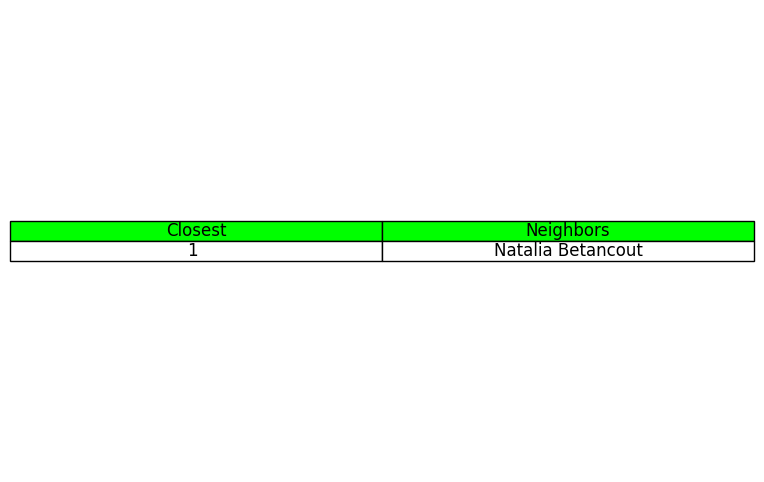

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

recommendation_df[['Leonardo DiCaprio', 'Martin Scorsese', 'Robert De Niro', 'Joe Pesci', 'Adam Sandler', 'Rob Schneider', 'Will Ferrell', 'John C. Reilly']] = scaler.fit_transform(recommendation_df[['Leonardo DiCaprio', 'Martin Scorsese', 'Robert De Niro', 'Joe Pesci', 'Adam Sandler', 'Rob Schneider', 'Will Ferrell', 'John C. Reilly']])

recommendation_df['Leonardo DiCaprio'] = recommendation_df['Leonardo DiCaprio'].apply(lambda x: x*leonardo_dicaprio*10)
recommendation_df['Martin Scorsese'] = recommendation_df['Martin Scorsese'].apply(lambda x: x * martin_scorsese*10)
recommendation_df['Robert De Niro'] = recommendation_df['Robert De Niro'].apply(lambda x: x * robert_de_niro*10)
recommendation_df['Joe Pesci'] = recommendation_df['Joe Pesci'].apply(lambda x: x * joe_pesci*10)
recommendation_df['Adam Sandler'] = recommendation_df['Adam Sandler'].apply(lambda x: x * adam_sandler*10)
recommendation_df['Rob Schneider'] = recommendation_df['Rob Schneider'].apply(lambda x: x * rob_schneider*10)
recommendation_df['Will Ferrell'] = recommendation_df['Will Ferrell'].apply(lambda x: x * will_ferrell*10)
recommendation_df['John C. Reilly'] = recommendation_df['John C. Reilly'].apply(lambda x: x * john_c_reilly*10)




def get_index_by_name(name):
    return recommendation_df[recommendation_df['User']== name].index.values[0]

def get_name_by_index(index): 
    return recommendation_df.loc[index, 'User']

def format_names_array(names_list):
    msg = ''
    for i in range(len(names_list)):
        msg +=str(i+1)+'. '+names_list[i] +'\n'
    return msg
            
def shuffle_lists(list1, list2):
 
    combined = list(zip(list1, list2))
    random.shuffle(combined)
    shuffled_list1, shuffled_list2 = zip(*combined)
    
    return list(shuffled_list1), list(shuffled_list2)

def plot_polar_distances(x,y,labels,x_dist,y_dist,labels_dist):

    fig, ax = plt.subplots(figsize=(9, 9))

    ax.grid(False)
    ax.axis('off')
    
    for i, label in enumerate(labels_dist):
        ax.annotate(label, (x_dist[i], y_dist[i]), textcoords="offset points", xytext=(0, 0), ha='center', color='#0472A2', fontsize=12)
    
    for i, label in enumerate(labels):
        ax.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center', color=('black', '#4B4B4B')[i>0], weight=('bold', 'regular')[i>0])

    for i in range(len(x)):
        ax.plot([0, x[i]], [0, y[i]], 'gray')
        
    ax.scatter(x, y)

    ax.set_title('Knn weighted graph respect to: '+labels[0], color='black', weight='bold')

    plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

    plt.show()
    

from sklearn.neighbors import NearestNeighbors

# Transforma la data numerica en un array
X = recommendation_df[recommendation_df.columns[1:]].to_numpy()

# Ajustar el modelo del modulo importado
nbrs = NearestNeighbors(n_neighbors=k_neighbors+1, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)


# Coger el index del usuario por su nombre en el dropdown
index = get_index_by_name(selected_user)
k_nearest_to_index = indices[index][1:]
k_nearets_names = list(map(get_name_by_index, k_nearest_to_index))

# Transforma la data numerica en un array
X = recommendation_df[recommendation_df.columns[1:]].to_numpy()

# Ajustar el modelo del modulo importado
nbrs = NearestNeighbors(n_neighbors=k_neighbors+1, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# Coger el index del usuario por su nombre en el dropdown
index = get_index_by_name(selected_user)
k_nearest_to_index = indices[index][1:]
k_nearest_names = list(map(get_name_by_index, k_nearest_to_index))

# Crear un DataFrame con los nombres de los vecinos más cercanos
neighbors_df = pd.DataFrame({'Neighbors': k_nearest_names})

# Agregar una columna con la enumeración de usuarios
neighbors_df.insert(0, 'Closest', [f'{i+1} ' for i in range(len(k_nearest_names))])

# Mostrar la tabla con los vecinos más cercanos
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')  # Ocultar ejes

tabla = ax.table(cellText=neighbors_df.values, colLabels=neighbors_df.columns, cellLoc='center', loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)

# Cambiar color de los títulos
tabla[0, 0].set_facecolor('#00FF00')  # Closest: rojo
tabla[0, 1].set_facecolor('#00FF00')  # Neighbors: verde

plt.show()

##### Creates a new dataframe from the neighbors

In [10]:

# 6. Creates "Proto user" to compare with movies

# Crear un nuevo df con los vecinos y sus valores de recommendation_df
k_nearest_to_index = indices[index][1:]

neighbor_df = recommendation_df.iloc[k_nearest_to_index, :].copy()

# Filtrar solo las columnas numéricas
columnas_numericas = neighbor_df.select_dtypes(include=[float, int])

# Calcular el promedio de cada columna numérica
promedio_valores = columnas_numericas.mean()

# Crear un nuevo DataFrame con el nuevo índice y los promedios
nuevo_df = pd.DataFrame([promedio_valores], index=["20"])
nuevo_df.insert(0, "Movie", "Proto user")

# Imprimir el nuevo DataFrame

nuevo_df



,Movie,Leonardo DiCaprio,Martin Scorsese,Johnny Depp,Tim Burton,Robert De Niro,Joe Pesci,Adam Sandler,Rob Schneider,Will Ferrell,John C. Reilly
20,Proto user,0.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#Agrega las cosas pasadas al df de peliculas para poder hacer la agregacion
new_movie_selector_df = movie_selector_df.append(nuevo_df)


# Imprimir el DataFrame actualizado
new_movie_selector_df


C:\Users\poved\AppData\Local\Temp\ipykernel_23408\2948408462.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_movie_selector_df = movie_selector_df.append(nuevo_df)


,Movie,Leonardo DiCaprio,Martin Scorsese,Johnny Depp,Tim Burton,Robert De Niro,Joe Pesci,Adam Sandler,Rob Schneider,Will Ferrell,John C. Reilly
0,Gangs of New York (2002),10.000000,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,The Aviator (2004),10.000000,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,The Departed (2006),10.000000,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,Shutter Island (2010),10.000000,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,The Wolf of Wall Street (2013),10.000000,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
5,Edward Scissorhands (1990),0.000000,0.000000,10.000000,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
6,Ed Wood (1994),0.000000,0.000000,10.000000,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
7,Sleepy Hollow (1999),0.000000,0.000000,10.000000,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
8,Charlie and the Chocolate Factory (2005),0.000000,0.000000,10.000000,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
9,Alice in Wonderland (2010),0.000000,0.000000,10.000000,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
